## Intro to TensorFlow

Tutorial link(s):
* https://www.youtube.com/watch?v=PcstG8qiObc

### First steps

In [20]:
import tensorflow as tf

In [21]:
x = tf.constant(4, shape=(1,1), dtype="float32")
x

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[4.]], dtype=float32)>

In [22]:
x = tf.constant([2, 4, 8, 1, 0, 1], shape=(2,3), dtype="float32")
x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[2., 4., 8.],
       [1., 0., 1.]], dtype=float32)>

In [23]:
x = tf.random.normal((3,3), mean=0, stddev=1)
x

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 1.8849566 , -0.05300517, -0.17180324],
       [-0.63679105,  0.4644367 , -1.0990039 ],
       [ 0.3861601 ,  0.3561187 ,  0.8435445 ]], dtype=float32)>

In [24]:
x = tf.random.uniform((3,3), minval=0, maxval=1)
x

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0.97424877, 0.84305406, 0.42297685],
       [0.49490058, 0.7055868 , 0.33493638],
       [0.9329144 , 0.5506381 , 0.05587482]], dtype=float32)>

### Tensors

In [25]:
x = tf.range(10) 
x

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [26]:
y = tf.Variable(x)
y = tf.cast(y, dtype="float32")
y

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)>

In [27]:
z = tf.cast(x, dtype="float32")
tf.add(z, y)

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.], dtype=float32)>

In [28]:
tf.tensordot(y,z,axes=1)

<tf.Tensor: shape=(), dtype=float32, numpy=285.0>

In [29]:
x = tf.random.normal((2,3))
y = tf.random.normal((3,2))

In [30]:
# z = tf.matmul(x,y)
z = x @ y
z

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.2196554 , -1.1425424 ],
       [ 4.894245  ,  0.44750047]], dtype=float32)>

In [31]:
z = tf.reshape(z, (4,1))
z

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[ 1.2196554 ],
       [-1.1425424 ],
       [ 4.894245  ],
       [ 0.44750047]], dtype=float32)>

#### Linear Regression for a single feature (auto-mpg)

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Make numpy printouts easier to read
np.set_printoptions(precision=3, suppress=True)

In [33]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
dataset = pd.read_csv(url, names=column_names, na_values='?',
                      comment='\t', sep=' ', skipinitialspace=True)
dataset = dataset.dropna()

In [34]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [35]:
origin = dataset.pop('Origin')
dataset['USA']    = (origin==1) * 1
dataset['Europe'] = (origin==2) * 1
dataset['Japan']  = (origin==3) * 1

In [36]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0


In [37]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_dataset.shape, test_dataset.shape

((314, 10), (78, 10))

In [38]:
# split features from labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [39]:
def plot(feature, x=None, y=None):
    plt.figure(figsize=(10, 8))
    plt.scatter(train_features[feature], train_labels, label='Data')
    if x is not None and y is not None:
        plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature)
    plt.ylabel('MPG')
    plt.legend()

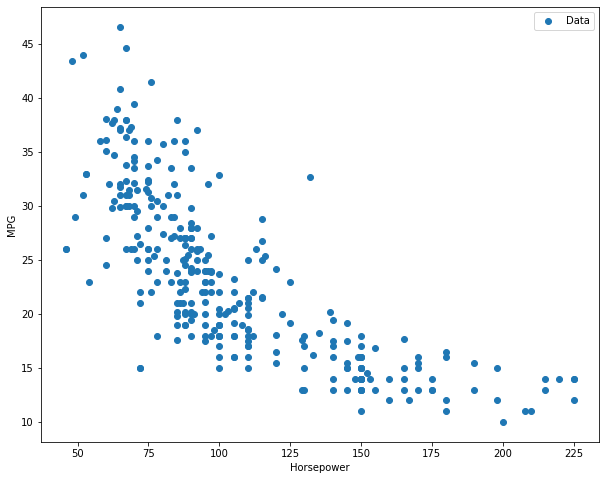

In [40]:
plot('Horsepower')

In [41]:
# normalize the data
normalizer = preprocessing.Normalization()
normalizer.adapt(train_features.to_numpy())

In [42]:
# (input-mean)/stddev
first = np.array(train_features[:1])
print('First example:', first)
print('Normalized:', normalizer(first).numpy())

First example: [[  28.     4.    90.    75.  2125.    14.5   74.     1.     0.     0. ]]
Normalized: [[ 0.608 -0.871 -1.011 -0.785 -1.027 -0.38  -0.517  0.776 -0.466 -0.496]]


In [43]:
# use regression to determine best fitting line through one feature
horsepower = np.array(train_features['Horsepower'])
horsepower = np.expand_dims(horsepower, axis=1)
horsepower_normalizer = preprocessing.Normalization(input_shape=[1,])
horsepower_normalizer.adapt(horsepower)

# building the sequential model
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])
horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [44]:
# compiling the model
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

# fitting the model
history = horsepower_model.fit(
    train_features['Horsepower'], train_labels,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

# visualizing the model's training progress using the stats stored in 
# history object
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.802354,4.190833,95
96,3.806958,4.199178,96
97,3.804315,4.195249,97
98,3.802950,4.179488,98
99,3.804268,4.196691,99


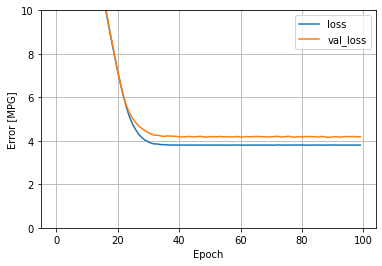

In [45]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0,10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)
plot_loss(history)

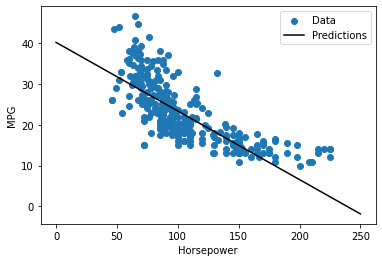

In [46]:
# evaluating the model on the test set
test_results = {}
test_results['horsepower_linear_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

# visualizing model's predictions as a function of the input
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

plt.scatter(train_features['Horsepower'], train_labels, label='Data')
plt.plot(x,y, color='k', label='Predictions')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
_ = plt.legend()

#### DNN for a single feature (auto-mpg)

In [47]:
# The Deep Neural Network Model
# This section implements single-input and multiple-input DNN models.
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation= 'relu'),
        layers.Dense(64, activation= 'relu'),
        layers.Dense(1)
    ])
    
    model.compile(loss='mean_absolute_error',
                 optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [48]:
# starting with a DNN model for a single input: "Horsepower"
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)
dnn_horsepower_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 64)                128       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


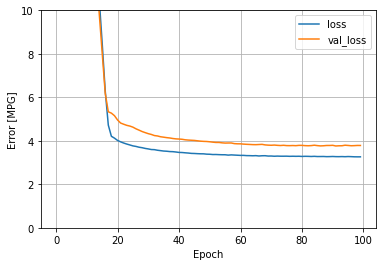

In [49]:
history = dnn_horsepower_model.fit(
    train_features['Horsepower'], train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)
plot_loss(history)

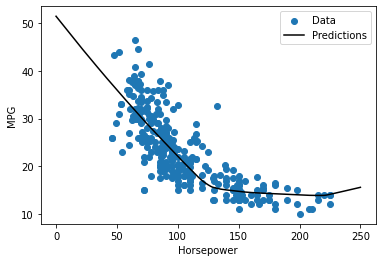

In [50]:
x = tf.linspace(0.0,250,251)
y = dnn_horsepower_model.predict(x)
plt.scatter(train_features['Horsepower'], train_labels, label='Data')
plt.plot(x,y, color='k', label='Predictions')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
_ = plt.legend()

In [51]:
test_results['horsepower_dnn_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0)
test_results    

{'horsepower_linear_model': 3.6480000019073486,
 'horsepower_dnn_model': 2.942014694213867}

#### DNN for all features (auto-mpg)

In [52]:
# full model
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 10)               21        
 n)                                                              
                                                                 
 dense_4 (Dense)             (None, 64)                704       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,950
Trainable params: 4,929
Non-trainable params: 21
_________________________________________________________________


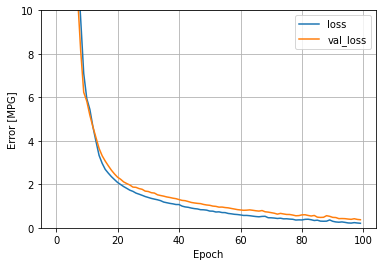

In [53]:
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100 )
plot_loss(history)

In [54]:
test_results['full_dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_linear_model,3.648000
horsepower_dnn_model,2.942015
full_dnn_model,0.339826


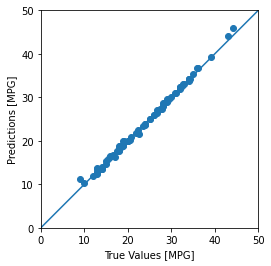

In [55]:
test_predictions = dnn_model.predict(test_features)
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0,50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)